# Credit Risk Evaluator

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

Prediction
In this Predictive model analysis, my prediction is Logistic regression will do better than a Random Forests classifier. Since we have data and qualifiers which can provide enough indicators for this model.

In [2]:
# Import the data
lending = pd.read_csv('Resources/lending_data.csv')
lending.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Split the Data into Training and Testing Sets

In [3]:
# Split the data into X_train, X_test, y_train, y_test
y = lending["loan_status"].values
X = lending.drop("loan_status", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
29175,8600.0,6.792,44500,0.325843,3,0,14500
23020,7800.0,6.419,41000,0.268293,2,0,11000
31269,10000.0,7.386,50100,0.401198,4,1,20100
35479,9300.0,7.093,47300,0.365751,3,0,17300
13470,9200.0,7.045,46900,0.360341,3,0,16900


In [4]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler model and fit it to the training data

X_scaler = StandardScaler()
X_scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [10]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Logistic Regression Unscaled Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Logistic Regression Unscaled Testing Data Score: {classifier.score(X_test, y_test)}")
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(classifier.predict(X_test[:10]))}')
print(f"Logistic Regression Scaled Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Logistic Regression Scaled Testing Data Score: {classifier.score(X_test_scaled, y_test)}")
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(classifier.predict(X_test_scaled[:10]))}')

Logistic Regression Unscaled Training Data Score: 0.9921240885954051
Logistic Regression Unscaled Testing Data Score: 0.9918489475856377
Actual:		[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Logistic Regression Scaled Training Data Score: 0.638309946347503
Logistic Regression Scaled Testing Data Score: 0.6370718118035493
Actual:		[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted:	[1, 0, 1, 1, 1, 1, 1, 0, 0, 1]


C:\Users\kls4f\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\kls4f\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\kls4f\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = y_test
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[18663,   102],
       [   56,   563]], dtype=int64)

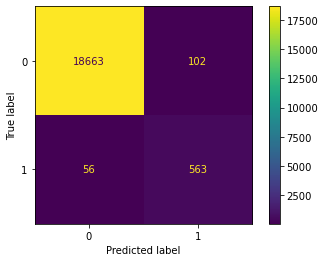

In [7]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

In [11]:
#Determine accuracy
tp,tn,fp,fn = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn) 
# (18656 + 580) / (18656 + 580 + 63 + 85)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9680664465538589


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, classifier.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77     18765
           1       0.08      1.00      0.15       619

    accuracy                           0.64     19384
   macro avg       0.54      0.81      0.46     19384
weighted avg       0.97      0.64      0.75     19384



C:\Users\kls4f\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [14]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1,n_estimators=50).fit(X_train, y_train)
print(f'Random Forest Unscaled Training Score: {clf.score(X_train, y_train)}')
print(f'Random Forest Unscaled Testing Score: {clf.score(X_test, y_test)}')
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(clf.predict(X_test[:10]))}')
clf = RandomForestClassifier(random_state=1,n_estimators=50).fit(X_train_scaled, y_train)
print(f'Random Forest Scaled Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Random Forest Scaled Testing Score: {clf.score(X_test_scaled, y_test)}')
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(clf.predict(X_test_scaled[:10]))}')

Random Forest Unscaled Training Score: 0.9974893382858715
Random Forest Unscaled Testing Score: 0.9910235245563351
Actual:		[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Random Forest Scaled Training Score: 0.9974893382858715
Random Forest Scaled Testing Score: 0.9910751134956666
Actual:		[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


[1.29066792e-01 2.74137485e-01 1.74521675e-01 1.58682971e-01
 1.18902531e-01 8.06639163e-05 1.44607881e-01]


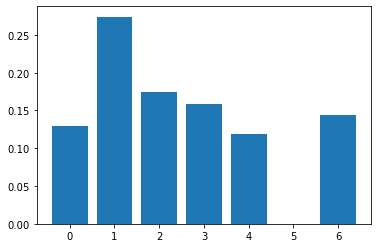

In [16]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [17]:
print(classification_report(y_test, clf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.90      0.87       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



In [18]:
from sklearn.feature_selection import SelectFromModel

In [19]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True,  True,  True, False, False,  True])

In [20]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\kls4f\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [21]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


In [22]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


*Which model performed better? How does that compare to your prediction? Replace the text in this markdown cell with your answers to these questions.*

Conclusions
Forest classifer performed better than logistic regression.
The logistic regression testing data score is much higher than the random forest classifier data test score.
Both models do relatively well, almost indistinguishable.